MyNet(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=10, bias=True)
)


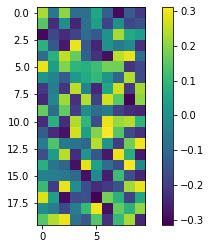

In [1]:
import torch
import matplotlib.pyplot as plt

# 创建一个神经网络
class MyNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(10, 20)
        self.fc2 = torch.nn.Linear(20, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = MyNet()

# 打印神经网络结构
print(net)

# 获取第一层权重张量
weights = net.state_dict()['fc1.weight']

# 将权重张量转换为numpy数组，并可视化
plt.imshow(weights.numpy())
plt.colorbar()
plt.show()

In [2]:
# print python version
import sys
print('python version: ', sys.version)

python version:  3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]


In [1]:
import argparse
import wandb
import time
import numpy as np
import random
import uuid
import torch
import torch.nn as nn
import torch.optim as optim

from AimbotEnv import Aimbot
from tqdm import tqdm
from torch.distributions.normal import Normal
from torch.distributions.categorical import Categorical
from distutils.util import strtobool
from torch.utils.tensorboard import SummaryWriter
from mlagents_envs.environment import UnityEnvironment
from mlagents_envs.side_channel.side_channel import (
    SideChannel,
    IncomingMessage,
    OutgoingMessage,
)
from typing import List
